# Part II - FordBikes Distribution of Duration per day and type
## by Timo Becker

## Investigation Overview

With regard to part 1, i wanted to show in this presentation how the number of trips per weekday, per hour and per customer type is distributed


## Dataset Overview and Executive Summary

The data consists of information regarding approximately 183412 rides made in a bike-sharing system covering the greater San Francisco Bay area. Due to inconsistent data (e.g. SNA values) the data set was adjusted by me. This leads to a dataset of 174952 unique entries.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# loading data
bikes = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
bikes.shape

(183412, 16)

In [4]:
# remove sna
bikes.dropna(inplace=True)

In [5]:
bikes.shape

(174952, 16)

In [6]:
bikes.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [7]:
#convert start and endtime
bikes['start_time'] = pd.to_datetime(bikes['start_time'])
bikes['end_time'] = pd.to_datetime(bikes['end_time'])

In [8]:
#get start month, day, hour
bikes['start_day'] = bikes['start_time'].dt.day_name()
bikes['start_month'] = bikes['start_time'].dt.month_name()
bikes['start_hr'] = bikes['start_time'].dt.hour

## Rides per Gender Type

In [9]:
print(bikes.member_gender.value_counts())

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64


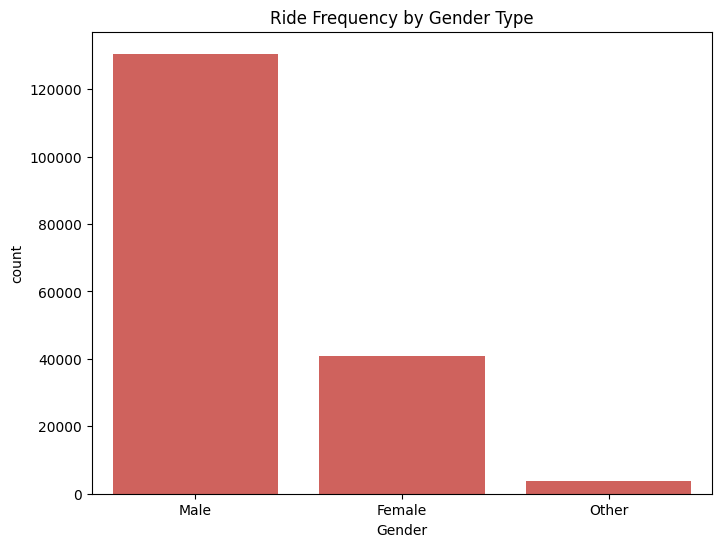

In [10]:
plt.figure(figsize = (8,6))
sns.countplot(data = bikes, x = 'member_gender',  color=sns.color_palette("Spectral")[0], order=bikes.member_gender.value_counts().index)
plt.xlabel('Gender')
plt.title('Ride Frequency by Gender Type');

We can see that the majority of users are male. As already mentioned in Part 1, an attempt should be made to expand the target group to include more women.

## Rides per Usertype

In [11]:
print(bikes.user_type.value_counts())

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64


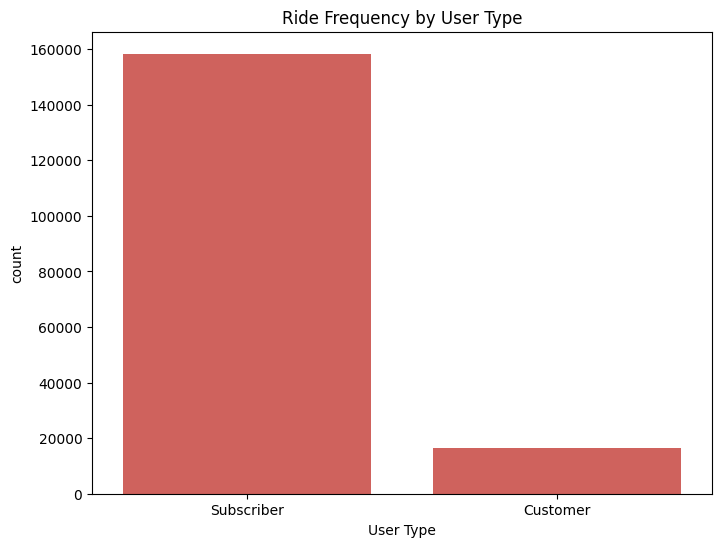

In [12]:
plt.figure(figsize = (8,6))
sns.countplot(data = bikes, x = 'user_type',  color=sns.color_palette("Spectral")[0], order=bikes.user_type.value_counts().index)
plt.xlabel('User Type')
plt.title('Ride Frequency by User Type');

90% percent of all riders are subscribers. Only 10% are Customers.

## Rides per Day

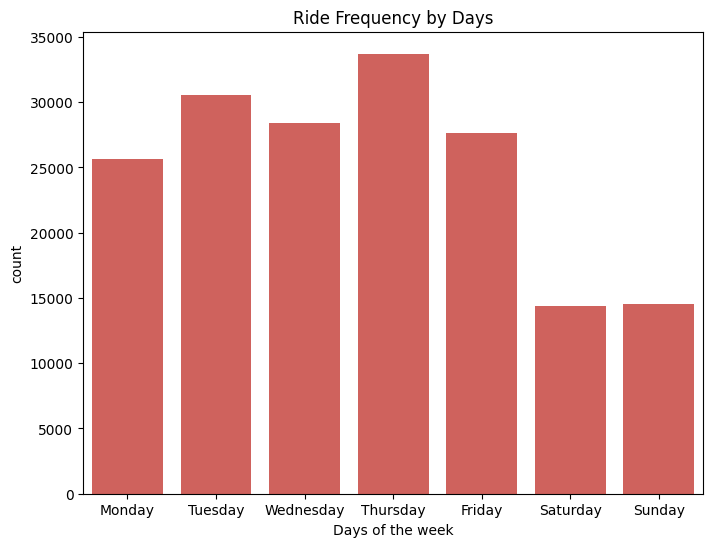

In [22]:
plt.figure(figsize = (8,6))
Weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data = bikes, x = 'start_day', color=sns.color_palette("Spectral")[0], order=Weekdays)
plt.xlabel('Days of the week')
plt.title('Ride Frequency by Days');

We see that the lowest trip records are on weekends. This is because the sharing system is probably mainly used for work. The most rides were taken on Thursdays and Tuesdays.

## Rides per Hour

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(data = bikes, x = 'start_hr', color=sns.color_palette("Spectral")[0])
plt.xlabel('Hours of the Day')
plt.title('Ride Frequency by Hours');

Here, too, we see similarities in times that are clearly attributable to rush hours where people leave for work and come back later in the evening. Thats why the highest riding frequency is at 8 a.m. and at 5 p.m.

## Generate Slideshow

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_explanatory_template.ipynb --to slides --post serve --no-input --no-prompt